# Introduction to AI : Coursework
-----------------------------------------
## Flight Delays Data Analysis & AI Techniques Application   

**Data Source** https://www.kaggle.com/usdot/flight-delays#flights.csv

### Background & Scope of Data

The explored dataset, flights.csv, represents the on-time performance of **domestic** flights operated by large air carriers in the **US**. In two complementary datasets, there are 14 Airlines inlcuded, as well as 322 airports, all represented by their IATA (International Air Transport Association) code. The table below shows an overview of the first ten rows of the two databases.

### Airlines & Airports Datasets

Here, we run initialization code, define python imports and load all csv files.

In [146]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from IPython.display import display_html

# Ensuring all columns are showed
pd.set_option('display.max_columns', 500)
# Ensuring the view is optimised by showing the 2 dataframes side by side
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline; margin-right:15px;"'), raw=True)
    
# Ensuring all floats included, and calculated such as mean median and other numbers would 
# return a float that's easy to understand, not in scientific notation.
pd.set_option('display.float_format', lambda x: '%.1f' % x)

data_dir_path = "data"
airlines_file_path = os.path.join(data_dir_path, "airlines.csv")
airports_file_path = os.path.join(data_dir_path, "airports.csv")
flights_file_path = os.path.join(data_dir_path, "flights.csv")

# loading all CSV files (they're original csv files that shouldn't be modified)
_airlines_csv = pd.read_csv(airlines_file_path)
_airports_csv = pd.read_csv(airports_file_path)
_flights_csv = pd.read_csv(flights_file_path)

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [147]:
display_side_by_side(_airlines_csv.head(10),_airports_csv.head(10))

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


### Main Flights Dataset
-----
The main dataset contains 31 columns and 5,819,079 rows of data in total. The analysis code has been applied to get an understanding of the quality and completeness of the data. Columns with a high percentage of nulls were dropped from the table as they are unreliable. The team has also studied the data types of all columns, and for the numerical values involved, an analysis has been performed on the mean, median, max and min values for a better understanding of the data. A search on what column represents has also been conducted to help understand the dataset.

In [148]:
#Loading the Airlines DF & displaying first 10 rows
_flights_csv.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,nan,nan,nan,nan,nan
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,nan,nan,nan,nan,nan
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,nan,nan,nan,nan,nan
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,nan,nan,nan,nan,nan
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,nan,nan,nan,nan,nan
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,NaN,nan,nan,nan,nan,nan
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0,NaN,nan,nan,nan,nan,nan
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0,NaN,nan,nan,nan,nan,nan
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,NaN,nan,nan,nan,nan,nan
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0,0,0,NaN,nan,nan,nan,nan,nan


### Data Fields Key properties:
 * __YEAR, MONTH, DAY:__ Year (2015 for all records), Month (January, February and March only inculded) and Day (1-31).
 * __DAY_OF_WEEK:__ Range of integers (1-7) inclusive, representing (Monday to Sunday).
 * __AIRLINE, FLIGHT_NUMBER, TAIL_NUMBER:__ Identifiers of airlines (IATA codes to be translated from Airlines dataset), flights and aircrafts.
 * __ORIGIN_AIRPORT, DESTINATION_AIRPORT:__ Identifiers of start and destination airports (IATA codes to be translated from Airports dataset).
 * __SCHEDULED_DEPARTURE, DEPARTURE_TIME, DEPARTURE_DELAY, TAXI_OUT, WHEELS_OFF:__ Departure/Pre-Trip data, from planned time in hours & minutes, actual departure time (WHEEL_OFF - TAXI_OUT) , delay (actual time - planned time), the time duration elapsed between departure from the origin airport gate and wheels off, and finally, the time point that the aircratf's wheels leave the ground, consecutively.
 * __SCHEDULED_TIME, ELAPSED_TIME, AIR_TIME, DISTANCE:__ Trip execution data, from planned time needed for the flight trip in mins, the actual elapsed time (AIR_TIME + TAXI_IN + TAXI_OUT) in mins, air_time (The time duration between wheels_off and wheels_on time) in mins and distance between the two airports in miles.
 * __WHEELS_ON, TAXI_IN, SCHEDULED_ARRIVAL, ARRIVAL_TIME, ARRIVAL_DELAY:__ Arrival data, from the time point that the aircraft's wheels touch on the ground, the time duration elapsed between wheels-on and gate arrival at the destination airport, planned arrival time, actual arrival time and arrival_delay (actual time - planned time).
 * __DIVERTED, CANCELLED, CANCELLATION_REASON, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY:__ Post-trip data on whether or not the flight was cancelled or landed on an airport out of schedule, both represented as binary values of 0 for false and 1 for true. Only for fligths where cancellation is 1 (true), a reason for cancellation is included as a Letter, such that A - Airline/Carrier; B - Weather; C - National Air System; D - Security. It is evident that weather is the most common reason for cancellation. Finally, the dataset summarizes 5 types of causes of a delay, and number of minutes of delay in each category is given. Our analysis show that reasons of delays are quite unreliable becuase there are many cases where records are missing all columns despite having an arrival delay. There are also some records with mins ditributed between more than one specific cause.

In [149]:
#Counting rows and columns
_flights_csv.shape

(5819079, 31)

In [150]:
#Viewing names and datatypes of coulmns
_flights_csv.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [151]:
#Viewing data quality in important columns
print("ARRIVAL TIME:\n", _flights_csv['ARRIVAL_TIME'].describe(), "\n YEAR \n", _flights_csv['YEAR'].describe())

ARRIVAL TIME:
 count   5726566.0
mean       1476.5
std         526.3
min           1.0
25%        1059.0
50%        1512.0
75%        1917.0
max        2400.0
Name: ARRIVAL_TIME, dtype: float64 
 YEAR 
 count   5819079.0
mean       2015.0
std           0.0
min        2015.0
25%        2015.0
50%        2015.0
75%        2015.0
max        2015.0
Name: YEAR, dtype: float64


In [152]:
_flights_csv['AIRLINE'].describe()

count     5819079
unique         14
top            WN
freq      1261855
Name: AIRLINE, dtype: object

In [153]:
_flights_csv['CANCELLATION_REASON'].describe()

count     89884
unique        4
top           B
freq      48851
Name: CANCELLATION_REASON, dtype: object

In [154]:
#Counting the number of null values per column as a percentage of total number of records
_flights_csv.notnull().sum()

YEAR                   5819079
MONTH                  5819079
DAY                    5819079
DAY_OF_WEEK            5819079
AIRLINE                5819079
FLIGHT_NUMBER          5819079
TAIL_NUMBER            5804358
ORIGIN_AIRPORT         5819079
DESTINATION_AIRPORT    5819079
SCHEDULED_DEPARTURE    5819079
DEPARTURE_TIME         5732926
DEPARTURE_DELAY        5732926
TAXI_OUT               5730032
WHEELS_OFF             5730032
SCHEDULED_TIME         5819073
ELAPSED_TIME           5714008
AIR_TIME               5714008
DISTANCE               5819079
WHEELS_ON              5726566
TAXI_IN                5726566
SCHEDULED_ARRIVAL      5819079
ARRIVAL_TIME           5726566
ARRIVAL_DELAY          5714008
DIVERTED               5819079
CANCELLED              5819079
CANCELLATION_REASON      89884
AIR_SYSTEM_DELAY       1063439
SECURITY_DELAY         1063439
AIRLINE_DELAY          1063439
LATE_AIRCRAFT_DELAY    1063439
WEATHER_DELAY          1063439
dtype: int64

In [155]:
#Dropping columns with the highest number of null values, this will give an error after it is run once,
#because columns will be dropped already, so run [46] and load data again.

columns_to_drop = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'WEATHER_DELAY', 'ORIGIN_AIRPORT', 'DISTANCE', 'CANCELLED']

print(f"Before drop: {_flights_csv.columns}")
_flights_csv.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')
print(f"After drop: {_flights_csv.columns}")

Before drop: Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')
After drop: Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY']

In [156]:
%%html
<style>
    table {
        display: inline-block;
    }
</style>

# Proposed Questions & Expected Outputs on the Data

| Question | Expected Output |
| :-       |-----------------| 
| a. Can we predict if there will be an arrival delay on specific days of the week?  | fdsfsdfsdfsdfsd | 
| b. Can we predict if there will be an arrival delay based on the airline involved? | dasdasdasdasdasda|
| c. Can we predict if longer flights (distance) have higher probability of being delayed? | asdasdadsas|
| d. Can we predict whether or not there will be a delay based on origin airport or state? | ahhjdadhakjdsh |

In [157]:
#Dropping columns of no interest in out proposed analysis: WHEELS_ON, WHEELS_OFF, YEAR, MONTH, DAY, DEPARTURE_TIME, 
#DIVERTED, TAIL_NUMBER, TAXI_IN, TAXI_OUT

flights_df = _flights_csv.copy()

flights_df.drop(['WHEELS_ON', 'WHEELS_OFF', 'YEAR', 'MONTH', 'DAY', 'DEPARTURE_TIME', 
'DIVERTED', 'TAIL_NUMBER', 'TAXI_IN', 'TAXI_OUT', 'DESTINATION_AIRPORT', 'FLIGHT_NUMBER', 'SCHEDULED_TIME','SCHEDULED_DEPARTURE', 'ELAPSED_TIME', 'AIR_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME'], axis=1, inplace=True)
flights_df.head()

,DAY_OF_WEEK,AIRLINE,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY
0,4,AS,-11.0,-22.0,nan,nan
1,4,AA,-8.0,-9.0,nan,nan
2,4,US,-2.0,5.0,nan,nan
3,4,AA,-5.0,-9.0,nan,nan
4,4,AS,-1.0,-21.0,nan,nan


### Question A: Can we predict if there will be an arrival delay on specific days of the week?
-------------
Methology 1: 


In [158]:
#Checking all days of the week are represented.
flights_df.groupby(['DAY_OF_WEEK']).size()

DAY_OF_WEEK
1    865543
2    844600
3    855897
4    872521
5    862209
6    700545
7    817764
dtype: int64

In [159]:
#Checking all deadline are represented
flights_df.groupby(['AIRLINE']).size()

AIRLINE
AA     725984
AS     172521
B6     267048
DL     875881
EV     571977
F9      90836
HA      76272
MQ     294632
NK     117379
OO     588353
UA     515723
US     198715
VX      61903
WN    1261855
dtype: int64

In [160]:
flights_df.loc[flights_df['ARRIVAL_DELAY'] < 0]

,DAY_OF_WEEK,AIRLINE,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY
0,4,AS,-11.0,-22.0,nan,nan
1,4,AA,-8.0,-9.0,nan,nan
3,4,AA,-5.0,-9.0,nan,nan
4,4,AS,-1.0,-21.0,nan,nan
6,4,NK,-6.0,-17.0,nan,nan
...,...,...,...,...,...,...
5819072,4,B6,7.0,-11.0,nan,nan
5819074,4,B6,-4.0,-26.0,nan,nan
5819075,4,B6,-4.0,-16.0,nan,nan
5819076,4,B6,-9.0,-8.0,nan,nan


In [161]:
#Dropping rows with negative delay.
flights_df.drop(flights_df[flights_df['ARRIVAL_DELAY'] < 0].index, inplace=True)

In [162]:
#Checking it is working
flights_df.loc[flights_df['ARRIVAL_DELAY'] < 0]

,DAY_OF_WEEK,AIRLINE,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY


In [163]:
#Final check on the individual columns in the dataset berfore splitting
flights_df.describe()

,DAY_OF_WEEK,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY
count,2318180.0,2232027.0,2213109.0,1063439.0,1063439.0
mean,3.9,28.6,31.2,19.0,23.5
std,2.0,53.7,52.0,48.2,43.2
min,1.0,-42.0,0.0,0.0,0.0
25%,2.0,-1.0,5.0,0.0,0.0
50%,4.0,12.0,14.0,2.0,3.0
75%,5.0,36.0,36.0,19.0,29.0
max,7.0,1988.0,1971.0,1971.0,1331.0


In [164]:
#Checking that no duplicated records exist.
(flights_df.duplicated(subset=None, keep='first')).describe()

count     2318180
unique          2
top          True
freq      1493746
dtype: object

In [165]:
#Shuffling the dataset first
flights_df = flights_df.reindex(np.random.permutation(flights_df.index))
#Splitting the dataset into Validation/Testing
mask = np.random.rand(len(flights_df)) < 0.8
trainDF = pd.DataFrame(flights_df[mask])
validationDF = pd.DataFrame(flights_df[~mask])

print(f"Training DF: {len(trainDF)}")
print(f"Validation DF: {len(validationDF)}")

Training DF: 1853838
Validation DF: 464342


### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the **fit()** method of the model instance.
5. Apply the Model to new data:


- For supervised learning, often we predict labels for unknown data using the **predict()** method.
- For unsupervised learning, we often transform or infer properties of the data using the **transform()** or 

In [166]:
print(flights_df.isnull().any())

DAY_OF_WEEK            False
AIRLINE                False
DEPARTURE_DELAY         True
ARRIVAL_DELAY           True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
dtype: bool


In [167]:
#Dropping all Null values
flights_df = flights_df.dropna()
print(flights_df.isnull().any())

DAY_OF_WEEK            False
AIRLINE                False
DEPARTURE_DELAY        False
ARRIVAL_DELAY          False
AIRLINE_DELAY          False
LATE_AIRCRAFT_DELAY    False
dtype: bool


In [168]:
flights_df

,DAY_OF_WEEK,AIRLINE,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY
2059006,1,US,-1.0,23.0,0.0,0.0
2382784,7,UA,39.0,29.0,1.0,28.0
1385159,1,UA,82.0,37.0,25.0,12.0
2768746,2,DL,16.0,15.0,5.0,2.0
24752,5,WN,43.0,34.0,18.0,16.0
...,...,...,...,...,...,...
2468283,5,DL,44.0,35.0,5.0,30.0
1523745,3,AA,75.0,92.0,75.0,0.0
3738012,4,WN,35.0,45.0,17.0,18.0
4261770,3,WN,30.0,16.0,16.0,0.0


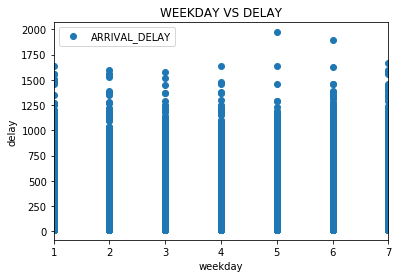

In [169]:
#Before performing Linear Regression, first checking correlation betweeb day of the week and arrival delay.
flights_df.plot(x='DAY_OF_WEEK', y='ARRIVAL_DELAY', style='o')  
plt.title('WEEKDAY VS DELAY')  
plt.xlabel('weekday')  
plt.ylabel('delay')  
plt.show()

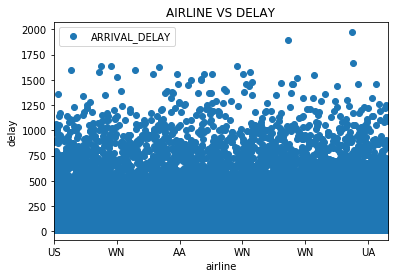

In [170]:
#Before performing Linear Regression, first checking correlation betweeb day of the week and arrival delay.
flights_df.plot(x='AIRLINE', y='ARRIVAL_DELAY', style='o')  
plt.title('AIRLINE VS DELAY')  
plt.xlabel('airline')  
plt.ylabel('delay')  
plt.show()
##LINEAR REGRESSION CANNOT BE BERFORMED ON THAT PAIR BECAUSE AIRLINE IS NOT NUMERIC!

In [171]:
X = flights_df['DAY_OF_WEEK'].values.reshape(-1,1)
y = flights_df['ARRIVAL_DELAY'].values.reshape(-1,1)

#split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# build the model
model = LinearRegression()  
model.fit(X_train, y_train)

print(model.coef_)

[[-0.55888889]]


In [172]:
#calculate the predictions of the linear regression model
y_pred = model.predict(X_test)

#build a new data frame with two columns, the actual values of the test data, 
#and the predictions of the model
df_compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_head = df_compare.head(25)
print(df_head)

    Actual  Predicted
0     92.0       57.7
1     40.0       57.1
2     32.0       59.3
3     26.0       57.1
4     63.0       60.5
5     34.0       58.8
6     32.0       58.2
7     15.0       57.1
8     30.0       59.9
9     78.0       58.8
10    21.0       58.8
11   241.0       57.7
12    18.0       60.5
13    81.0       57.1
14    15.0       57.1
15    44.0       60.5
16    89.0       59.9
17    15.0       58.8
18    40.0       58.8
19    15.0       57.1
20   183.0       59.3
21    32.0       58.2
22    30.0       57.7
23    27.0       58.8
24   117.0       58.2


### Question B: Can we predict if there will be an arrival delay based on the airline involved?

Here, we're going to train a model to predict whether a plane will be delayed based on airline's history track record.

Before we do that, we need to determine what kind of data would be needed for training. First thing that comes to mind is the name of an airline and how many flights managed by it have been delayed. For that, we would need columns __AIRLINE__ and all delay related columns: __AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY__

Now, we can already see the problem that most delay reasons are not relevant to our research because the question at hand asks if model can be trained to predict if delay can be predicted based on an _airline involved_. With that said, most of the columns related to delays are out of airline's control such as __WEATHER_DELAY.

Taking that into account, we're now left with __AIRLINE_DELAY__ and __LATE_AIRCRAFT_DELAY__.

#### Preparing data

First, let's fetch data from _flights.csv_ file and keep only columns we need (as mentioned above).

In [205]:
columns = ['AIRLINE', 'LATE_AIRCRAFT_DELAY', 'AIRLINE_DELAY']

flights_df_dtypes = {
    columns[0]: np.string_,
    columns[1]: np.float64,
    columns[2]: np.float64,
}

flights_df = _flights_csv.copy()
flights_df = flights_df[columns]
flights_df.head(10)

,AIRLINE,LATE_AIRCRAFT_DELAY,AIRLINE_DELAY
0,AS,nan,nan
1,AA,nan,nan
2,US,nan,nan
3,AA,nan,nan
4,AS,nan,nan
5,DL,nan,nan
6,NK,nan,nan
7,US,nan,nan
8,AA,nan,nan
9,DL,nan,nan


We have some pieces of data that are empty. Let's drop all rows which have at least 1 null column.

In [206]:
# drop null values
flights_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print(f'Total rows: {flights_df.shape[0]:,}')
flights_df.head(10)

Total rows: 1,063,439


,AIRLINE,LATE_AIRCRAFT_DELAY,AIRLINE_DELAY
27,NK,0.0,0.0
30,NK,0.0,0.0
35,HA,0.0,15.0
50,B6,0.0,0.0
52,B6,0.0,85.0
55,B6,0.0,72.0
70,AA,0.0,0.0
73,US,0.0,60.0
74,AA,0.0,54.0
86,AA,0.0,53.0


Now, delays won't do us good being separate, so we're going to sum them together and put them into a new column simply called __DELAY__

In [207]:
flights_df['DELAY'] = flights_df['LATE_AIRCRAFT_DELAY'] + flights_df['AIRLINE_DELAY']
# now we can safely drop previous tables
flights_df.drop(['LATE_AIRCRAFT_DELAY', 'AIRLINE_DELAY'], axis=1, errors='ignore', inplace=True)
flights_df.head(10)

,AIRLINE,DELAY
27,NK,0.0
30,NK,0.0
35,HA,15.0
50,B6,0.0
52,B6,85.0
55,B6,72.0
70,AA,0.0
73,US,60.0
74,AA,54.0
86,AA,53.0


With delay calculated, we want to drop all values that are below zero. Values that are zero or less are 

In [208]:
flights_df = flights_df[flights_df['DELAY'] > 0]
print(f'Total rows: {flights_df.shape[0]:,}')
flights_df.head(10)

Total rows: 837,080


,AIRLINE,DELAY
35,HA,15.0
52,B6,85.0
55,B6,72.0
73,US,60.0
74,AA,54.0
86,AA,53.0
92,UA,19.0
97,B6,19.0
102,UA,56.0
120,AA,55.0


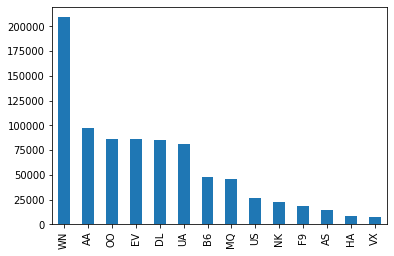

In [218]:
pd.value_counts(flights_df['AIRLINE']).plot.bar()